<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/nobel_winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

from plotnine import *

In [13]:
nobel_winners = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/nobel_winners.csv")

nobel_winners = nobel_winners.assign(birth_date = pd.to_datetime(nobel_winners['birth_date']))
nobel_winners = nobel_winners.assign(death_date = pd.to_datetime(nobel_winners['death_date']))
nobel_winners = nobel_winners.assign(age = nobel_winners['death_date'] - nobel_winners['birth_date'])
nobel_winners = nobel_winners.assign(age = nobel_winners['age'].astype('timedelta64[Y]'))

 First, let's get an overall look at the data.

In [14]:
nobel_winners

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,58.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,68.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,63.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,82.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaT,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaT,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaT,NaN,NaN,NaN


TypeError: ignored

How old does the average nobel prize-winner tend to be?

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


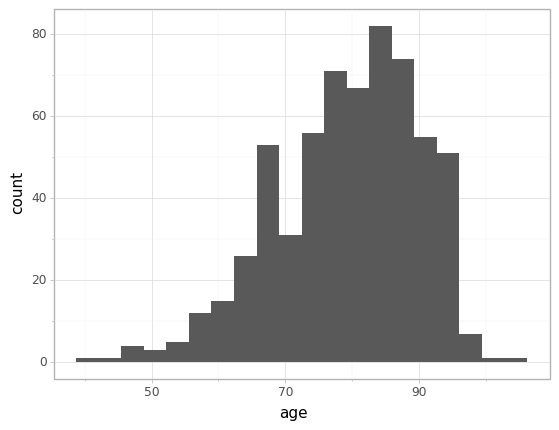

<ggplot: (8751587746799)>

In [19]:
nobel_winners[['age']].describe()

(
    ggplot(
        aes(
            x = 'age'
        ),
        data = nobel_winners[['age']].dropna()
    ) +
    geom_histogram() +
    theme_light() +
    ggtitle('Distribution of Nobel Prize Winners by Age')
)

So how does the age distribution break down by field?

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


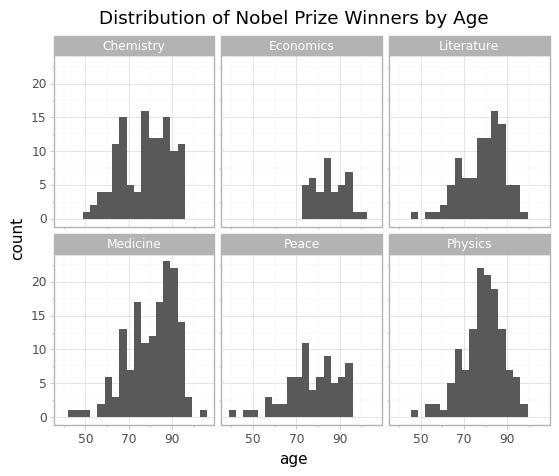

<ggplot: (8751584705309)>

In [22]:
(
    ggplot(
        aes(
            x = 'age'
        ),
        data = nobel_winners[['age', 'category']].dropna()
    ) +
    geom_histogram() +
    facet_wrap('~ category') +
    theme_light() +
    ggtitle('Distribution of Nobel Prize Winners by Age')
)

Do the data look any better if we try to do a smoothed kernel density estimate?

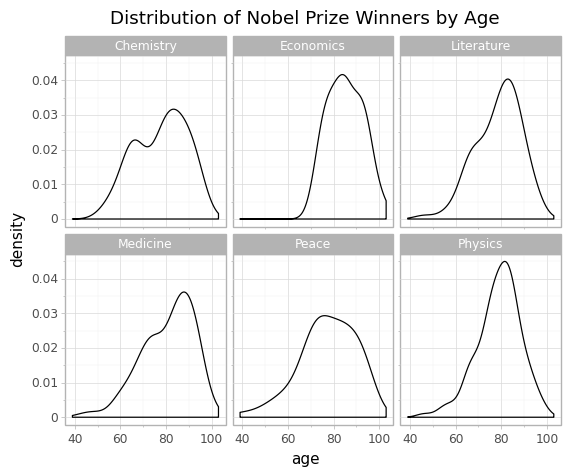

<ggplot: (-9223363285270219632)>

In [25]:
(
    ggplot(
        aes(
            x = 'age'
        ),
        data = nobel_winners[['age', 'category']].dropna()
    ) +
    geom_density() +
    facet_wrap('~ category') +
    theme_light() +
    ggtitle('Distribution of Nobel Prize Winners by Age')
)